In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys, requests, shutil, os
from urllib import request
from skimage import io
from skimage.transform import resize
import time, gc

%matplotlib inline

In [28]:
train = pd.read_csv('./data/train_resized.csv')
test = pd.read_csv('./data/test.csv')

print('Train:\t\t', train.shape)
print('Test:\t\t', test.shape)

print('Landmarks:\t', len(train['landmark_id'].unique()))

Train:		 (1223295, 3)
Test:		 (117703, 2)
Landmarks:	 14950


In [29]:
train['url'].values[:10]

array(['http://static.panoramio.com/photos/original/70761397.jpg',
       'http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/AAAAAAAAAE4/cDiNGkoQX88/s1600/',
       'http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/AAAAAAAAAco/-7JrhF1dfso/s1600/',
       'https://lh3.googleusercontent.com/-LOW2cjAqubA/RvE11dfgUaI/AAAAAAAABoU/ItwXEejtwHg/rj/',
       'https://lh5.googleusercontent.com/-tnmSXwQcWL8/SfhIj_3pugI/AAAAAAAAAdg/X55Wx8dGz-Q/s1600/',
       'https://lh5.googleusercontent.com/-mEaSECO7D-4/SwmpqVy2zDI/AAAAAAAAm-0/X_HxNBVc9zQ/rj/',
       'http://lh6.ggpht.com/-cJMh9AYQGk8/SOkF_Q5PrjI/AAAAAAAACa4/YWapKF6Wwuo/s1600/',
       'https://lh4.googleusercontent.com/-Q_FvRlwaaa8/SM9h2Ie41HI/AAAAAAAADnw/bfCvOoJy6iY/s1600/',
       'https://lh3.googleusercontent.com/-Px33Q-wekRI/SRoKZcmruOI/AAAAAAAAFI8/zEGgYlTmoFk/s1600/',
       'http://lh3.ggpht.com/-KXyELwqwp_Q/Ry-qmQAqwUI/AAAAAAAAAoU/SUt6osy86xk/s1600/'],
      dtype=object)

In [30]:
train.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


In [31]:
train[train['landmark_id'] == 4676]['url'].values[:10]

array(['http://static.panoramio.com/photos/original/70761397.jpg',
       'http://lh3.ggpht.com/-HaYHVq_p1bw/TkBWrmXk5QI/AAAAAAAAEes/3Qv5rkf9Kgk/s1600/',
       'https://lh6.googleusercontent.com/-yvOPqxeHi-s/UqtYn7Sbr5I/AAAAAAAAACE/AaN3GJPtBFo/s1600/',
       'https://lh3.googleusercontent.com/-HbVlGnbQ6_M/TfZ3dyIBzTI/AAAAAAAAGdQ/CtfgGB5RjXs/s1600/',
       'https://lh3.googleusercontent.com/-Pd1lbxfp9zY/T9oUv7DRoPI/AAAAAAAABIQ/oOHoodCa6Lc/s1600/',
       'https://lh6.googleusercontent.com/-30PUuc6k4hk/S_sDXYc1_UI/AAAAAAAAAYg/ST4jBTkkw60/s1600/',
       'http://lh6.ggpht.com/-Q0S-E0bJpjY/T3q6z0W0RII/AAAAAAAAAHc/PnEbAnD614w/s1600/',
       'http://mw2.google.com/mw-panoramio/photos/medium/11467171.jpg',
       'https://lh5.googleusercontent.com/-BkuI8_HLPdc/UGdTM5Y-T2I/AAAAAAAAA5Q/WL7_mSV8Q6s/s1600/',
       'https://lh5.googleusercontent.com/-kGs07UogpSs/UI7hccEdq_I/AAAAAAAABHs/hxGTfoln7ZI/s1600/'],
      dtype=object)

In [33]:
train[train['landmark_id'] == 4676][:10]

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1104,3e9e0ab46fed53ad,http://lh3.ggpht.com/-HaYHVq_p1bw/TkBWrmXk5QI/...,4676
1859,7aae54ac440d28a6,https://lh6.googleusercontent.com/-yvOPqxeHi-s...,4676
3982,48c5251d8971d032,https://lh3.googleusercontent.com/-HbVlGnbQ6_M...,4676
66205,8d0f73930ae632f7,https://lh3.googleusercontent.com/-Pd1lbxfp9zY...,4676
81957,2feb71aa7cd7ae0b,https://lh6.googleusercontent.com/-30PUuc6k4hk...,4676
87223,fe7d967af96f7dcf,http://lh6.ggpht.com/-Q0S-E0bJpjY/T3q6z0W0RII/...,4676
97561,dc74179aa7a8fc95,http://mw2.google.com/mw-panoramio/photos/medi...,4676
106224,980252f49091c243,https://lh5.googleusercontent.com/-BkuI8_HLPdc...,4676
110952,dbf6c0af548143a6,https://lh5.googleusercontent.com/-kGs07UogpSs...,4676


In [60]:
img1 = io.imread('./data/train_resized/3982.jpg')
img2 = io.imread('./data/train_resized/0.jpg')
img3 = io.imread('./data/train_resized/6.jpg')
img4 = io.imread('./data/train_resized/5.jpg')
img5 = io.imread('./data/train_resized/7.jpg')

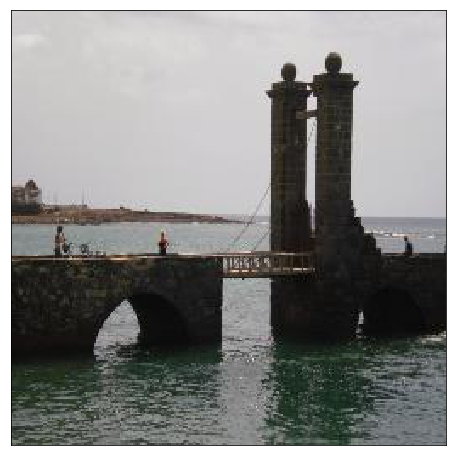

In [61]:
plt.figure(figsize=(8, 8))
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
plt.show()

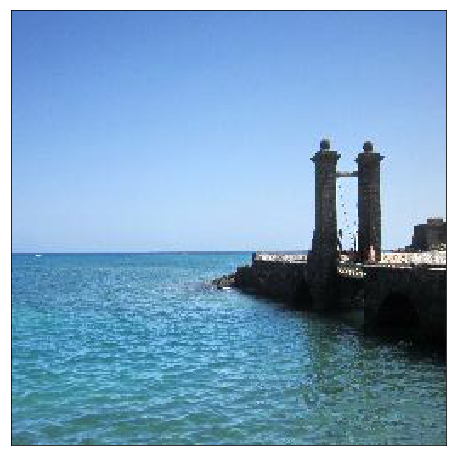

In [62]:
plt.figure(figsize=(8, 8))
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.show()

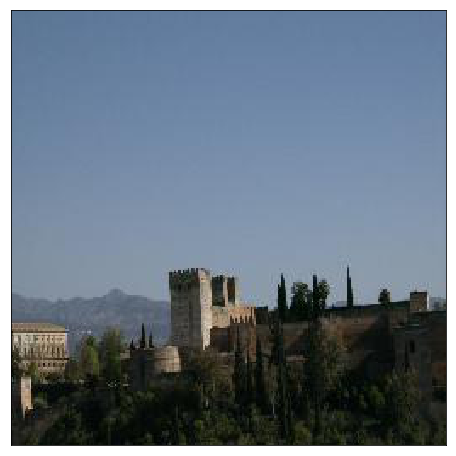

In [63]:
plt.figure(figsize=(8, 8))
plt.imshow(img3)
plt.xticks([])
plt.yticks([])
plt.show()

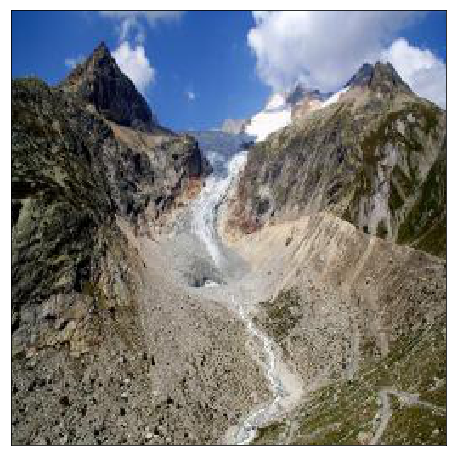

In [64]:
plt.figure(figsize=(8, 8))
plt.imshow(img4)
plt.xticks([])
plt.yticks([])
plt.show()

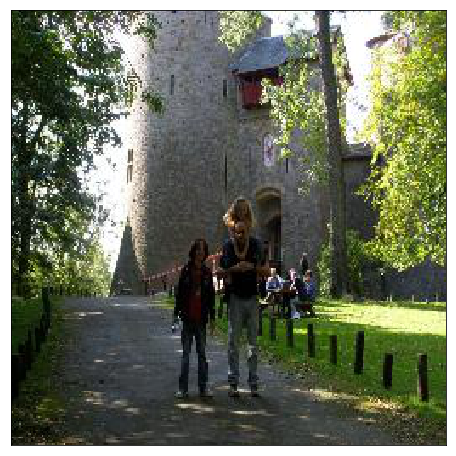

In [65]:
plt.figure(figsize=(8, 8))
plt.imshow(img5)
plt.xticks([])
plt.yticks([])
plt.show()